<a href="https://colab.research.google.com/github/YoshifumiMiyagi/EDV_3D/blob/main/EDV3D_exclude_echo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
SEED = 42

import numpy as np
import pandas as pd
import codecs

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [195]:
with codecs.open("/content/drive/MyDrive/EDV3D_R5_12_14_DB1.csv", "r", "Shift-JIS", "ignore") as file:
    raw = pd.read_table(file, delimiter=",")
raw

,EDV_3D,SEX,Age (years)_1,Body weight (kg),Height (cm),BSA (m2)_Dubois,SBP mmHg,DBP mmHg,HR bpm,Base,...,MVE cm/s,TVE cm/sed,IVSe,IVS_s,Lve,LVs,Tve,TVs,AseVp,IVC
0,55.5,F,8.900000,30.00,130.0,1.039326,85.0,50.0,110.0,-28.0,...,114.00,62.0,17.00,8.00,26.00,12,17.80,14.20,NaN,10.90
1,54.8,M,13.720548,37.55,152.8,1.285479,105.0,45.0,50.0,-25.0,...,103.60,NaN,13.30,8.47,27.60,8.69,22.60,13.40,117.00,21.23
2,49.5,M,12.290411,40.20,151.3,1.313849,109.0,51.0,69.0,-28.0,...,95.25,72.2,15.18,7.24,18.89,8.87,17.66,12.17,134.41,20.20
3,48.7,M,8.641096,28.90,137.5,1.065411,108.0,42.0,61.0,-24.0,...,121.00,87.0,12.09,6.54,19.31,9.66,13.97,10.76,101.84,19.20
4,73.0,M,14.317808,54.40,169.0,1.618876,138.0,71.0,62.0,-26.0,...,96.90,65.4,13.54,6.71,22.10,11.22,16.17,14.02,102.61,18.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,NaN,M,3.345000,13.95,97.7,0.610216,77.0,51.0,93.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,NaN,M,6.284932,20.50,113.0,0.798626,94.0,49.0,75.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,NaN,M,7.263014,23.95,118.8,0.884735,104.0,60.0,82.0,-27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,M,8.016438,33.40,125.5,1.060414,86.0,47.0,70.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
df = raw.dropna(subset="EDV_3D")
df['SEX'] = df['SEX'].replace(['M', 'F'], [0, 1])
df

<ipython-input-196-e970c36ccd25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEX'] = df['SEX'].replace(['M', 'F'], [0, 1])


,EDV_3D,SEX,Age (years)_1,Body weight (kg),Height (cm),BSA (m2)_Dubois,SBP mmHg,DBP mmHg,HR bpm,Base,...,MVE cm/s,TVE cm/sed,IVSe,IVS_s,Lve,LVs,Tve,TVs,AseVp,IVC
0,55.5,1,8.900000,30.000,130.000,1.039326,85.0,50.0,110.0,-28.0,...,114.00,62.00,17.00,8.00,26.00,12,17.80,14.20,NaN,10.90
1,54.8,0,13.720548,37.550,152.800,1.285479,105.0,45.0,50.0,-25.0,...,103.60,NaN,13.30,8.47,27.60,8.69,22.60,13.40,117.00,21.23
2,49.5,0,12.290411,40.200,151.300,1.313849,109.0,51.0,69.0,-28.0,...,95.25,72.20,15.18,7.24,18.89,8.87,17.66,12.17,134.41,20.20
3,48.7,0,8.641096,28.900,137.500,1.065411,108.0,42.0,61.0,-24.0,...,121.00,87.00,12.09,6.54,19.31,9.66,13.97,10.76,101.84,19.20
4,73.0,0,14.317808,54.400,169.000,1.618876,138.0,71.0,62.0,-26.0,...,96.90,65.40,13.54,6.71,22.10,11.22,16.17,14.02,102.61,18.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,4.3,0,0.000000,2.938,51.000,0.196461,66.0,35.0,108.0,-27.0,...,61.58,39.25,5.75,4.92,9.75,5.75,9.65,7.23,71.18,NaN
466,3.4,0,0.000000,50.000,3.056,0.085146,76.0,39.0,136.0,-29.0,...,64.85,49.13,6.35,5.08,7.70,6.35,7.38,8.12,66.19,NaN
467,3.3,0,0.000000,51.000,3.532,0.095367,84.0,52.0,100.0,-19.0,...,39.68,62.07,4.37,3.67,7.52,4.56,5.65,5.04,64.18,NaN
468,3.5,1,0.000000,3.366,53.000,0.214037,79.0,38.0,140.0,-17.0,...,50.67,50.32,5.96,3.74,6.19,5.57,8.66,5.88,59.49,NaN


In [197]:
df["Avring"] = pd.to_numeric(df["Avring"], errors="coerce")
df["Pvring"] = pd.to_numeric(df["Pvring"], errors="coerce")
df["2D_LVESV"] = pd.to_numeric(df["2D_LVESV"], errors="coerce")
df["LVs"] = pd.to_numeric(df["LVs"], errors="coerce")

<ipython-input-197-ff7348bc8888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Avring"] = pd.to_numeric(df["Avring"], errors="coerce")
<ipython-input-197-ff7348bc8888>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pvring"] = pd.to_numeric(df["Pvring"], errors="coerce")
<ipython-input-197-ff7348bc8888>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [198]:
df = df.iloc[:,0:9]

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 469
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDV_3D            447 non-null    float64
 1   SEX               447 non-null    int64  
 2   Age (years)_1     447 non-null    float64
 3   Body weight (kg)  447 non-null    float64
 4   Height (cm)       447 non-null    float64
 5   BSA (m2)_Dubois   447 non-null    float64
 6   SBP mmHg          422 non-null    float64
 7   DBP mmHg          421 non-null    float64
 8   HR bpm            432 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 34.9 KB


<ipython-input-200-c834b66031f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EDV_3D'])


count    447.000000
mean      28.577405
std       25.713138
min        2.500000
25%        4.300000
50%       29.000000
75%       47.300000
max      142.500000
Name: EDV_3D, dtype: float64
skewness: 0.693
kurtsis: -0.0449


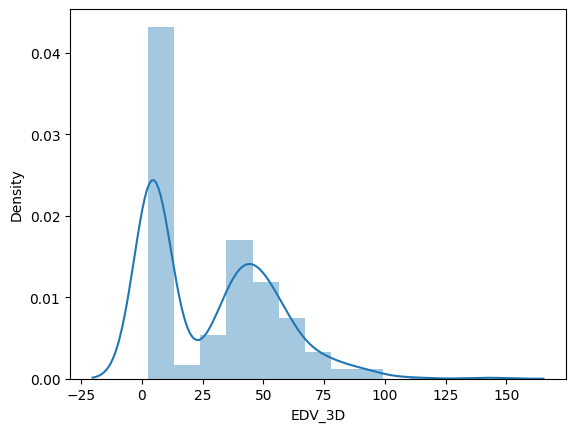

In [200]:
sns.distplot(df['EDV_3D'])
print(df["EDV_3D"].describe())
print(f"skewness: {round(df['EDV_3D'].skew(),4)}" )
print(f"kurtsis: {round(df['EDV_3D'].kurt(),4)}" )

<ipython-input-201-b4b8a76ebaa2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age (years)_1'])


<Axes: xlabel='Age (years)_1', ylabel='Density'>

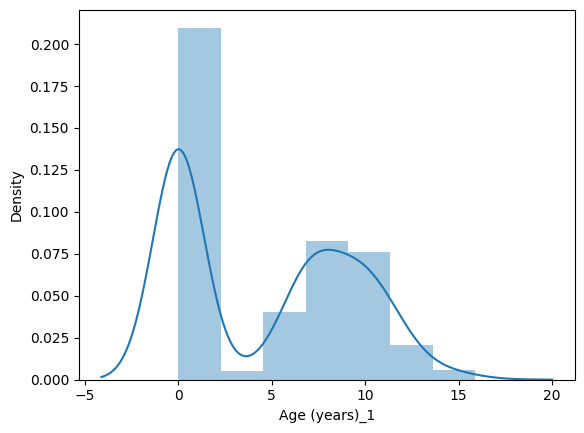

In [201]:
sns.distplot(df['Age (years)_1'])

<Axes: >

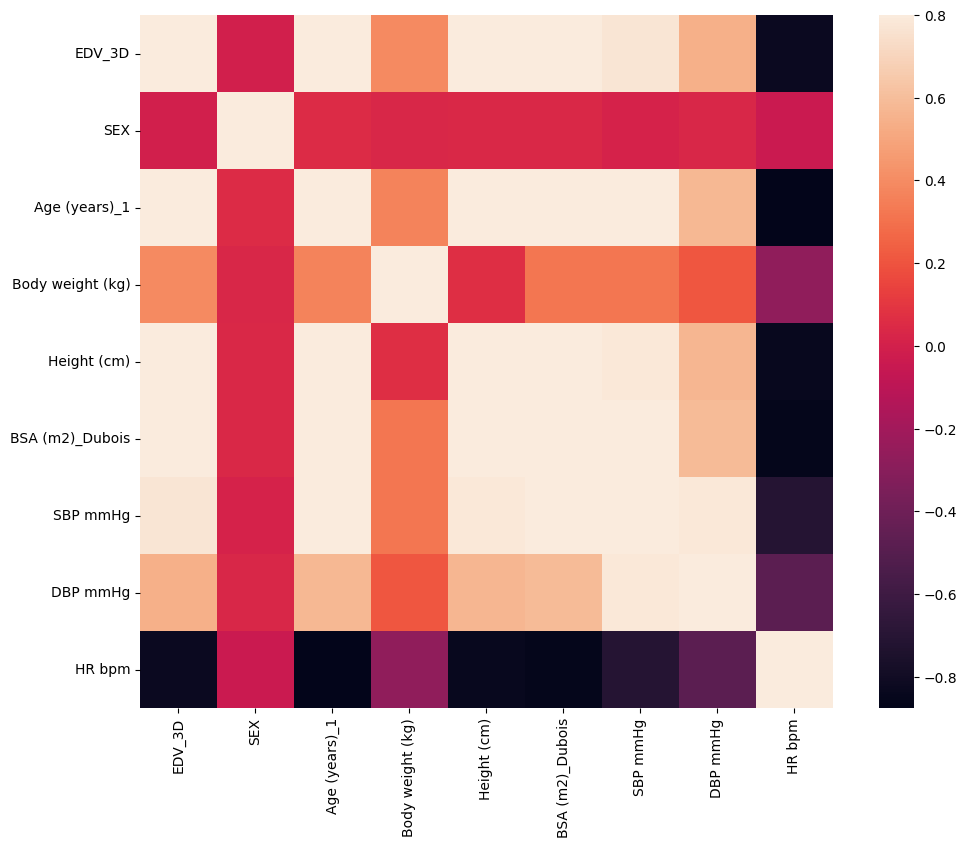

In [202]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [203]:
cor = pd.DataFrame(df.corr()["EDV_3D"].sort_values(ascending = False))
cor.columns = ["Correlation"]
cor[0:20]

,Correlation
EDV_3D,1.000000
BSA (m2)_Dubois,0.953192
Age (years)_1,0.930190
Height (cm),0.891472
SBP mmHg,0.770710
DBP mmHg,0.541126
Body weight (kg),0.390174
SEX,-0.009112
HR bpm,-0.825187


In [204]:
df.isnull().sum()

EDV_3D               0
SEX                  0
Age (years)_1        0
Body weight (kg)     0
Height (cm)          0
BSA (m2)_Dubois      0
SBP mmHg            25
DBP mmHg            26
HR bpm              15
dtype: int64

In [205]:
out =[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df:
        z = (i-m)/sd
        if np.abs(z) > 3:
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df.loc[:,'Body weight (kg)'])

Outliers: [86.5]


In [207]:
out2 =[]
def Zscore_outlier2(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df:
        z = (i-m)/sd
        if np.abs(z) > 3:
            out2.append(i)
    print("Outliers:",out2)
Zscore_outlier2(df.loc[:,'DBP mmHg'])

Outliers: [85.0]


Body weight (kg):86.5kg,  DBP mmHg : 85.0mmHg →　outliers

In [181]:
df = df.drop(df[(df['Body weight (kg)'] == 86.5) | (df['DBP mmHg'] == 85.0)].index)

In [182]:
imp_mean = IterativeImputer(random_state=SEED)
DF = imp_mean.fit_transform(df)
DF = pd.DataFrame(DF, columns = df.columns)
DF

,EDV_3D,SEX,Age (years)_1,Body weight (kg),Height (cm),BSA (m2)_Dubois,SBP mmHg,DBP mmHg,HR bpm
0,55.5,1.0,8.900000,30.000,130.000,1.039326,85.0,50.0,110.000000
1,54.8,0.0,13.720548,37.550,152.800,1.285479,105.0,45.0,50.000000
2,49.5,0.0,12.290411,40.200,151.300,1.313849,109.0,51.0,69.000000
3,48.7,0.0,8.641096,28.900,137.500,1.065411,108.0,42.0,61.000000
4,73.0,0.0,14.317808,54.400,169.000,1.618876,138.0,71.0,62.000000
...,...,...,...,...,...,...,...,...,...
440,4.3,0.0,0.000000,2.938,51.000,0.196461,66.0,35.0,108.000000
441,3.4,0.0,0.000000,50.000,3.056,0.085146,76.0,39.0,136.000000
442,3.3,0.0,0.000000,51.000,3.532,0.095367,84.0,52.0,100.000000
443,3.5,1.0,0.000000,3.366,53.000,0.214037,79.0,38.0,140.000000


# VIF

In [183]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler = StandardScaler()
X = scaler.fit_transform(DF.select_dtypes(include = ["int64", "float64"]).drop("EDV_3D", axis = 1))

X = pd.DataFrame(X, columns = list(DF.select_dtypes(include = ["int64", "float64"]).drop("EDV_3D", axis = 1)))

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,SEX,1.010037
1,Age (years)_1,41.232451
2,Body weight (kg),22.536117
3,Height (cm),264.145085
4,BSA (m2)_Dubois,204.005810
5,SBP mmHg,5.724871
6,DBP mmHg,2.800315
7,HR bpm,4.879809


# Model

In [184]:
x = DF.drop("EDV_3D", axis = 1)
y = DF["EDV_3D"]

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = SEED)

In [186]:
lgbm = LGBMRegressor(boosting_type='gbdt',
 class_weight=None,
 colsample_bytree=1.0,
 importance_type= 'split',
 learning_rate= 0.2,
 max_depth= 4,
 min_child_samples= 20,
 min_child_weight= 0.001,
 min_split_gain= 0.0,
 n_estimators= 85,
 n_jobs= None,
 num_leaves= 31,
 objective= None,
 random_state= SEED,
 reg_alpha= 0.0,
 reg_lambda= 0.0,
 subsample= 1.0,
 subsample_for_bin= 200000,
 subsample_freq= 0)
lgbm.fit(x_train, y_train)

pred = lgbm.predict(x_test)
print(r2_score(y_test,pred))
#print(mean_absolute_error(pred, y_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 356, number of used features: 8
[LightGBM] [Info] Start training from score 28.310112
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [187]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 85,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [188]:
importance = pd.DataFrame(lgbm.feature_importances_, index=x.columns, columns=['importance']).sort_values('importance', ascending=False)
display(importance)

,importance
BSA (m2)_Dubois,111
Age (years)_1,93
Height (cm),81
Body weight (kg),70
DBP mmHg,70
SBP mmHg,60
HR bpm,58
SEX,13


In [189]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def True_Pred_map(pred_df):
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    R2 = r2_score(pred_df['true'], pred_df['pred'])
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

In [190]:
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(pred)], axis=1)
pred_df.columns = ['true', 'pred']

In [191]:
pred_df.head()

,true,pred
0,4.6,4.312173
1,4.3,5.551257
2,57.1,45.705555
3,5.4,3.932163
4,44.5,40.704899


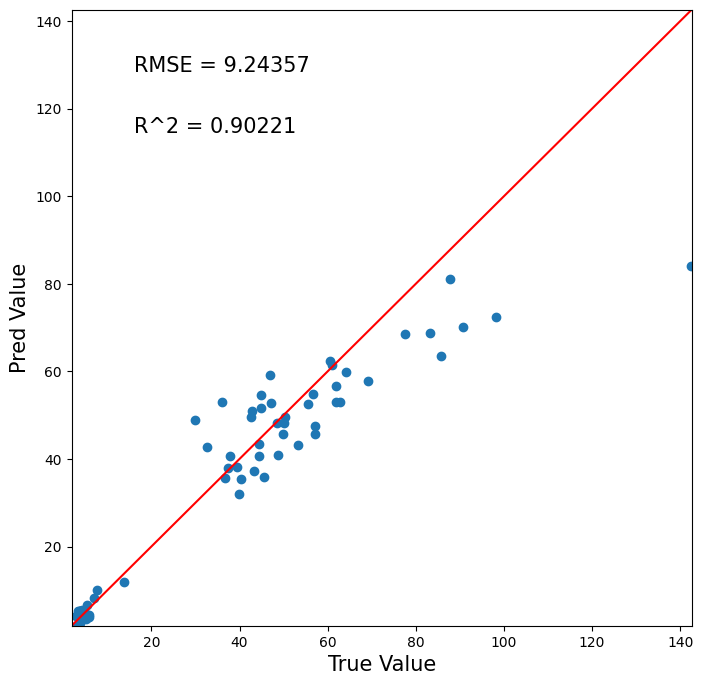

In [192]:
True_Pred_map(pred_df)